In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("matches.csv")

In [3]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.drop("id", axis=1,inplace=True)

In [5]:
data.tail()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [6]:
data.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
data['city'].fillna(method="bfill",inplace=True)

In [8]:
data['umpire3'].fillna(method="bfill",inplace=True)

In [9]:
data['winner'].fillna("Draw",inplace=True)
data['player_of_match'].fillna(method="bfill",inplace=True)
data['umpire1'].fillna(method="bfill",inplace=True)
data['umpire2'].fillna(method="bfill",inplace=True)

In [10]:
data.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [11]:
win=[]
win=data['winner'].unique()
d={}
def func(list1):
    for i in range(len(list1)):
        d[win[i]]=i
func(win)
d

{'Sunrisers Hyderabad': 0,
 'Rising Pune Supergiant': 1,
 'Kolkata Knight Riders': 2,
 'Kings XI Punjab': 3,
 'Royal Challengers Bangalore': 4,
 'Mumbai Indians': 5,
 'Delhi Daredevils': 6,
 'Gujarat Lions': 7,
 'Chennai Super Kings': 8,
 'Rajasthan Royals': 9,
 'Deccan Chargers': 10,
 'Pune Warriors': 11,
 'Kochi Tuskers Kerala': 12,
 'Draw': 13,
 'Rising Pune Supergiants': 14,
 'Delhi Capitals': 15}

In [12]:
def func2(t,data):
    for i in range (len(data[t])):
        if data[t][i] in d.keys():
            data[t][i]=d.get(data[t][i])
func2('winner',data)
func2("team1",data)
func2('toss_winner',data)
func2("team2",data)

<ipython-input-12-ae1ccde21b03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[t][i]=d.get(data[t][i])


In [13]:
data

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2017,Hyderabad,2017-04-05,0,4,4,field,normal,0,0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Anil Chaudhary
1,2017,Pune,2017-04-06,5,1,1,field,normal,0,1,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Anil Chaudhary
2,2017,Rajkot,2017-04-07,7,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Anil Chaudhary
3,2017,Indore,2017-04-08,1,3,3,field,normal,0,3,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Anil Chaudhary
4,2017,Bangalore,2017-04-08,4,6,4,bat,normal,0,4,15,0,KM Jadhav,M Chinnaswamy Stadium,A Deshmukh,NJ Llong,Anil Chaudhary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2019,Mumbai,05/05/19,2,5,5,field,normal,0,5,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,2019,Chennai,07/05/19,8,5,8,bat,normal,0,5,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,2019,Visakhapatnam,08/05/19,0,15,15,field,normal,0,15,0,2,RR Pant,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
754,2019,Visakhapatnam,10/05/19,15,8,8,field,normal,0,8,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


<AxesSubplot:xlabel='season', ylabel='Count'>

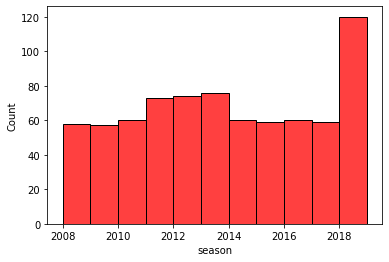

In [14]:
sns.histplot(data['season'],color="red")

<AxesSubplot:xlabel='toss_decision', ylabel='Count'>

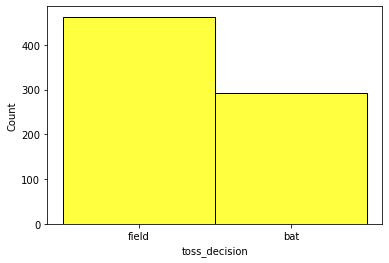

In [15]:
sns.histplot(data['toss_decision'],color='yellow')

<AxesSubplot:>

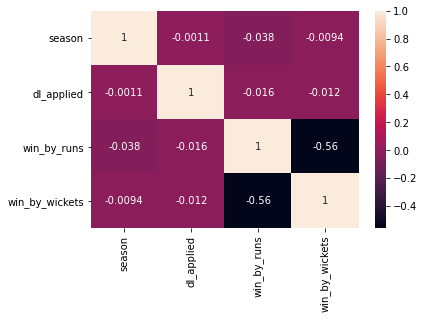

In [16]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='result', ylabel='dl_applied'>

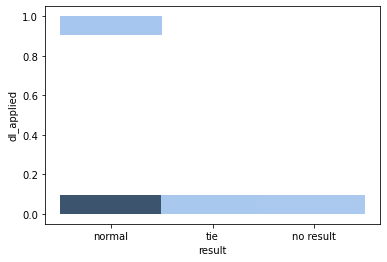

In [17]:
sns.histplot(x='result',y='dl_applied',data=data)

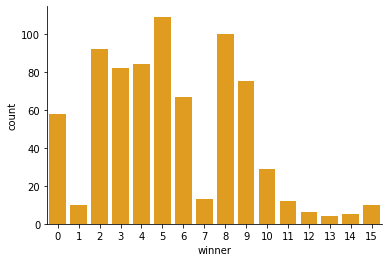

In [21]:
sns.countplot(x='winner',data=data,color='orange')
sns.despine()

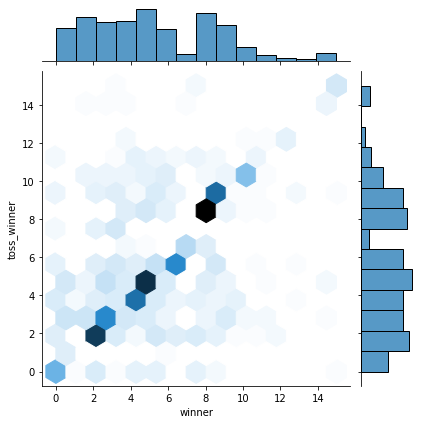

In [22]:
sns.jointplot(x='winner',y='toss_winner',data=data,kind='hex')

<AxesSubplot:xlabel='winner', ylabel='season'>

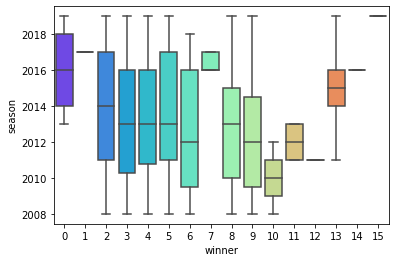

In [23]:
sns.boxplot(y="season", x="winner", data=data,palette='rainbow')

<AxesSubplot:xlabel='winner', ylabel='city'>

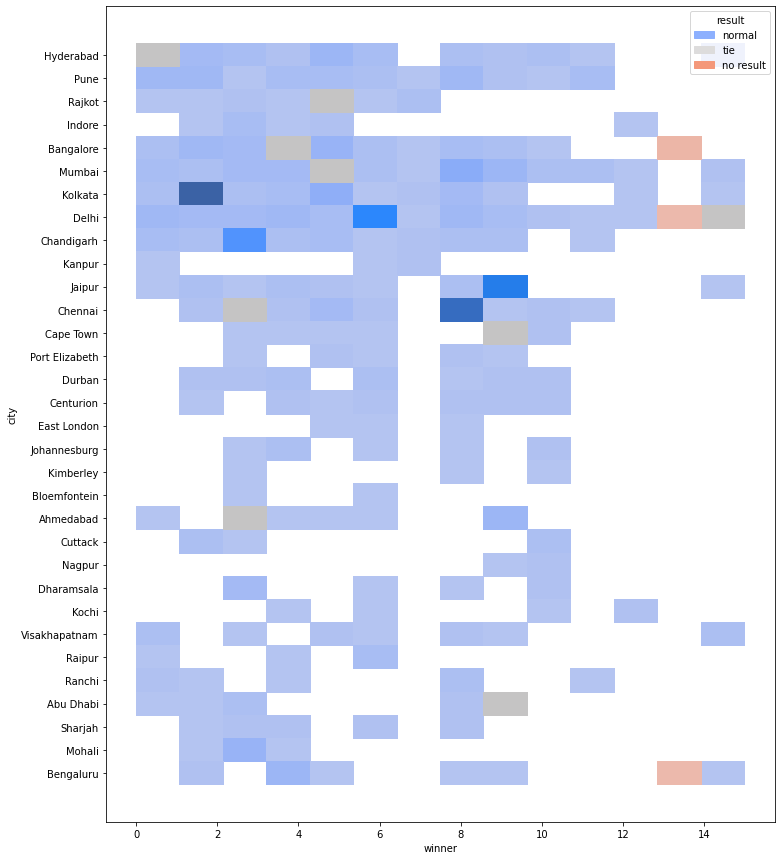

In [24]:
plt.figure(figsize=(12,15))
sns.histplot(x="winner", y="city", hue="result",data=data, palette="coolwarm")

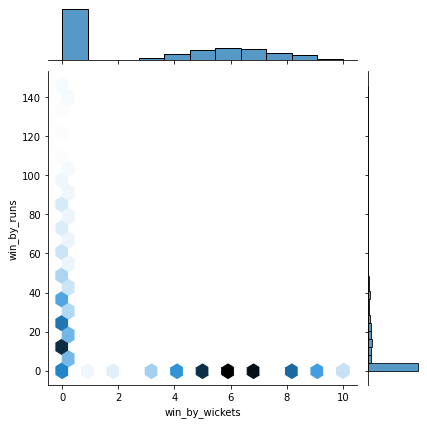

In [25]:
sns.jointplot(x='win_by_wickets',y='win_by_runs',data=data,kind='hex')

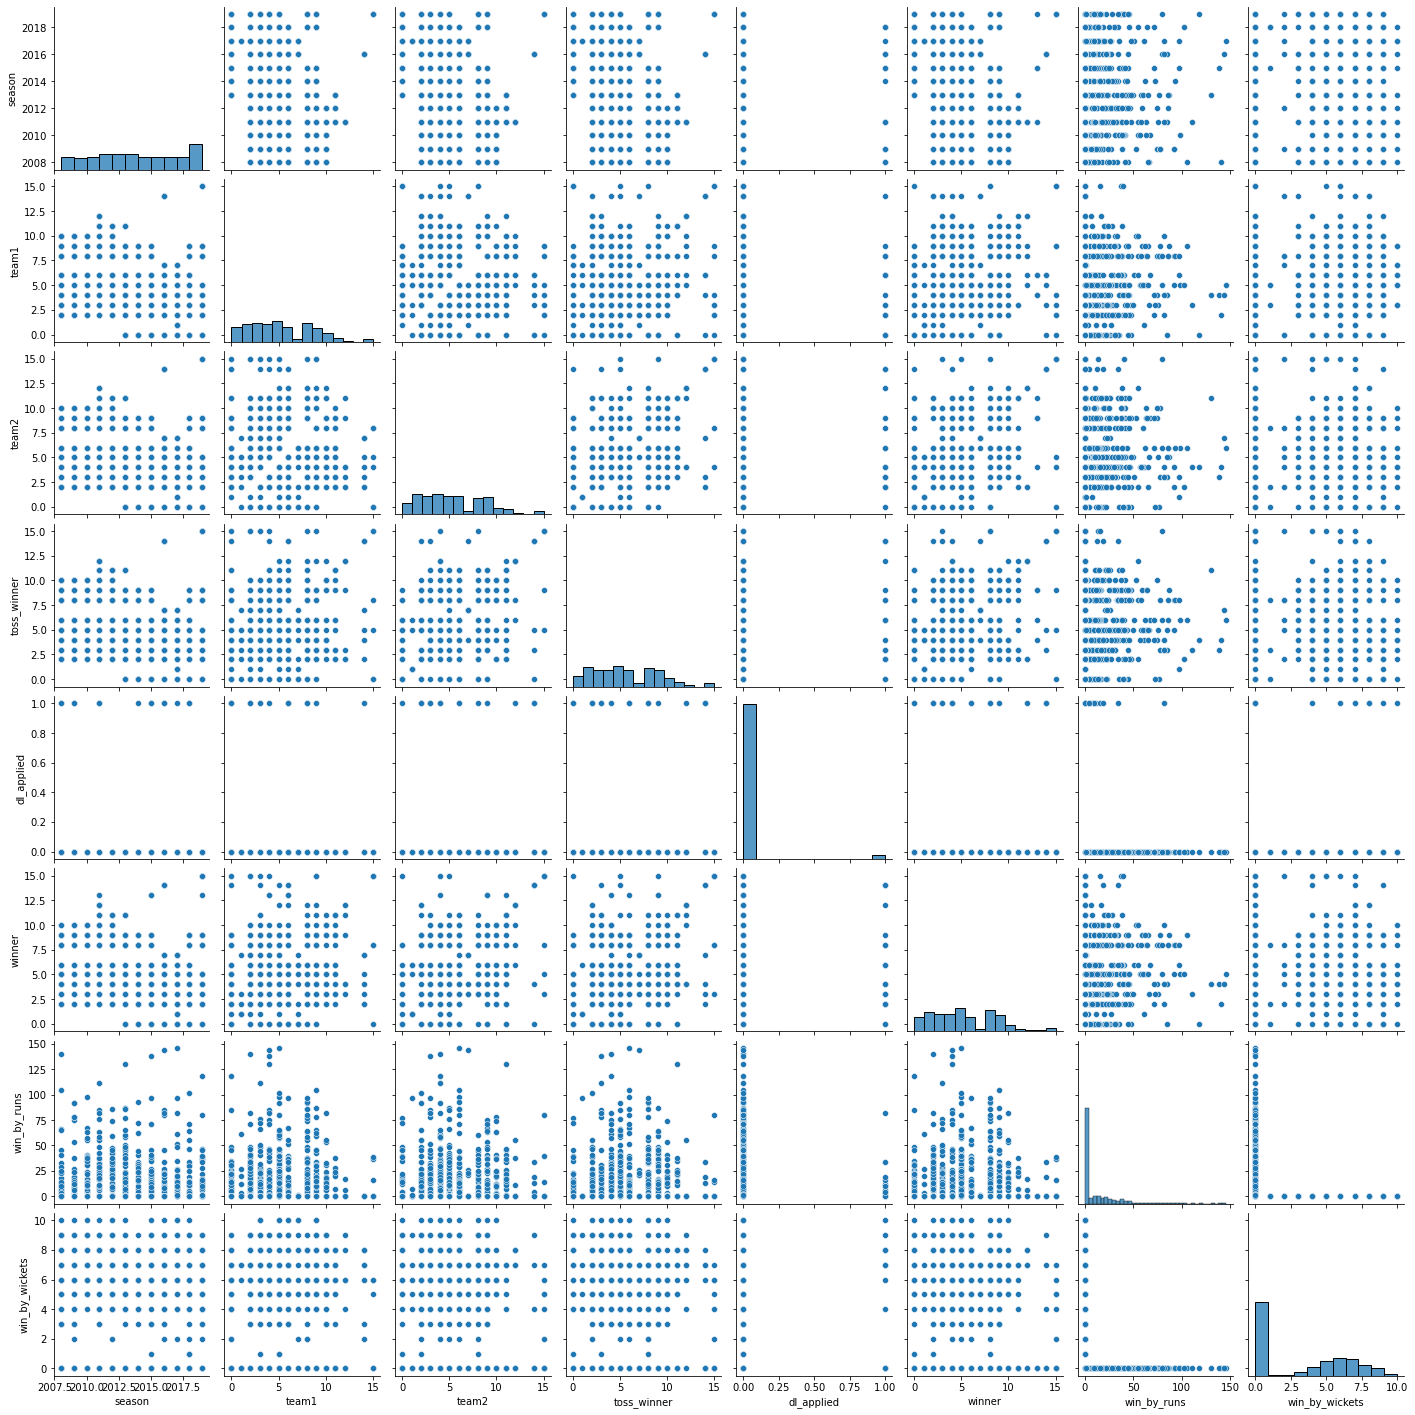

In [26]:
sns.pairplot(data)